# Importing libraries and load dataSet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score




df=pd.read_csv("/kaggle/input/exercise-detection-dataset/exercise_angles.csv")
print(df.info())
print(df.isnull().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31033 entries, 0 to 31032
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Side                   31033 non-null  object 
 1   Shoulder_Angle         31033 non-null  float64
 2   Elbow_Angle            31033 non-null  float64
 3   Hip_Angle              31033 non-null  float64
 4   Knee_Angle             31033 non-null  float64
 5   Ankle_Angle            31033 non-null  float64
 6   Shoulder_Ground_Angle  31033 non-null  float64
 7   Elbow_Ground_Angle     31033 non-null  float64
 8   Hip_Ground_Angle       31033 non-null  float64
 9   Knee_Ground_Angle      31033 non-null  float64
 10  Ankle_Ground_Angle     31033 non-null  float64
 11  Label                  31033 non-null  object 
dtypes: float64(10), object(2)
memory usage: 2.8+ MB
None
Side                     0
Shoulder_Angle           0
Elbow_Angle              0
Hip_Angle               

# EDA(Exploratory Data Analysis)




In [ ]:
print(df.describe())

       Shoulder_Angle   Elbow_Angle     Hip_Angle    Knee_Angle   Ankle_Angle  \
count    31033.000000  31033.000000  31033.000000  31033.000000  31033.000000   
mean        66.522206    114.303010    137.466151    143.273623    135.211957   
std         60.226756     57.906279     57.048278     48.041715     53.304068   
min          0.002748      0.000974      0.006850      0.116036      0.031297   
25%         17.852184     58.900491    111.556724    123.646144    106.740814   
50%         40.585632    132.999090    168.374922    168.227063    162.926184   
75%        121.209005    168.769517    175.656498    177.225089    175.735039   
max        179.991577    179.998861    179.999848    179.999277    179.999942   

       Shoulder_Ground_Angle  Elbow_Ground_Angle  Hip_Ground_Angle  \
count           31033.000000        31033.000000      31033.000000   
mean               88.816743           88.926949         79.408694   
std                14.546233           13.856550         42.

# Univariate Analysis (Examine one variable at a time)


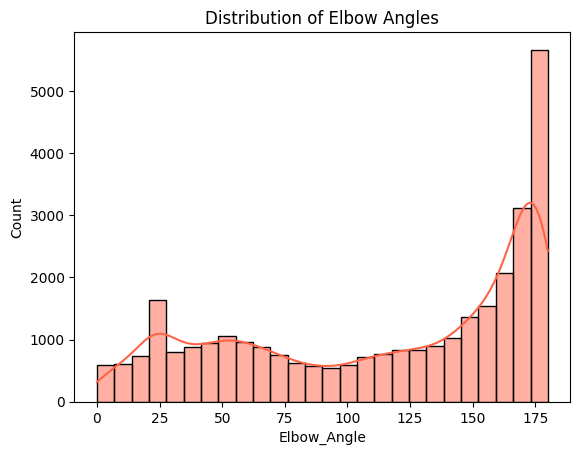

In [ ]:
sns.histplot(data=df, x='Elbow_Angle', kde=True, color='#FF6347')
plt.title('Distribution of Elbow Angles')
plt.show()

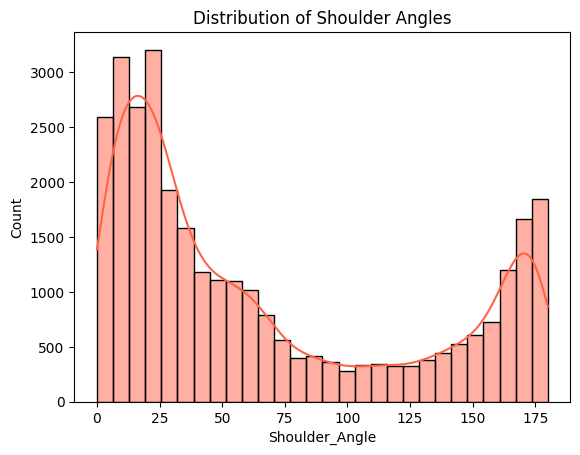

In [ ]:
sns.histplot(data=df, x='Shoulder_Angle', kde=True,color='#FF6347')
plt.title('Distribution of Shoulder Angles')
plt.show()


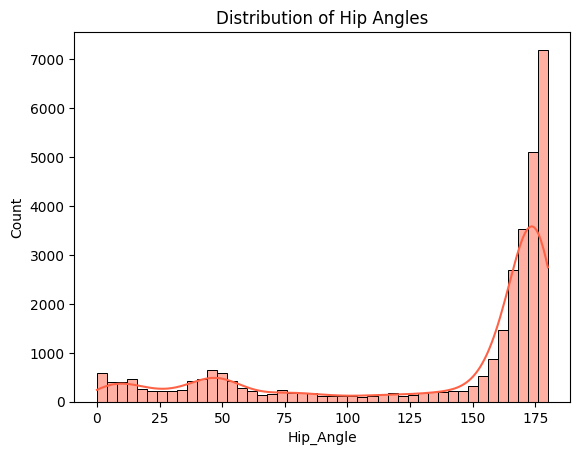

In [ ]:
sns.histplot(data=df, x='Hip_Angle', kde=True,color='#FF6347')
plt.title('Distribution of Hip Angles')
plt.show()


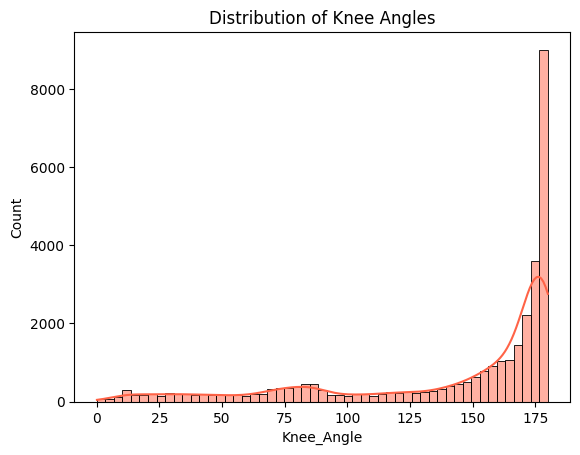

In [ ]:
sns.histplot(data=df, x='Knee_Angle', kde=True,color='#FF6347')
plt.title('Distribution of Knee Angles')
plt.show()


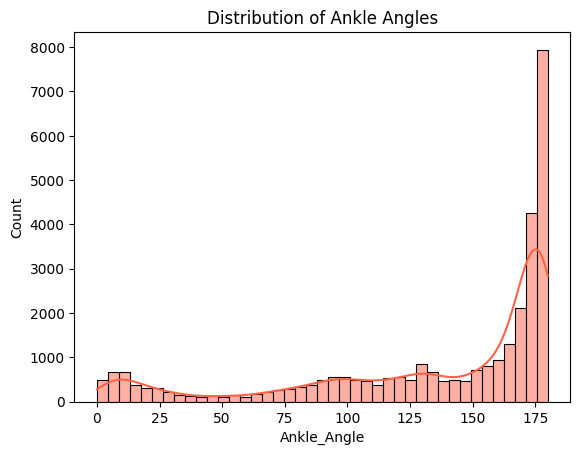

In [ ]:
sns.histplot(data=df, x='Ankle_Angle', kde=True,color='#FF6347')
plt.title('Distribution of Ankle Angles')
plt.show()


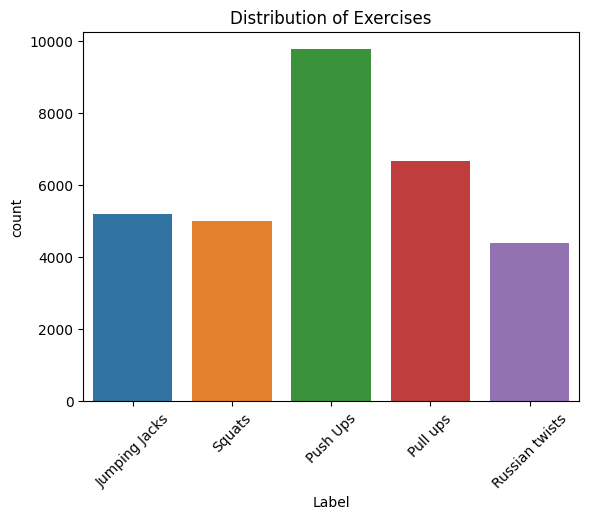

In [ ]:
sns.countplot(data=df, x='Label')
plt.title('Distribution of Exercises')
plt.xticks(rotation=45)
plt.show()


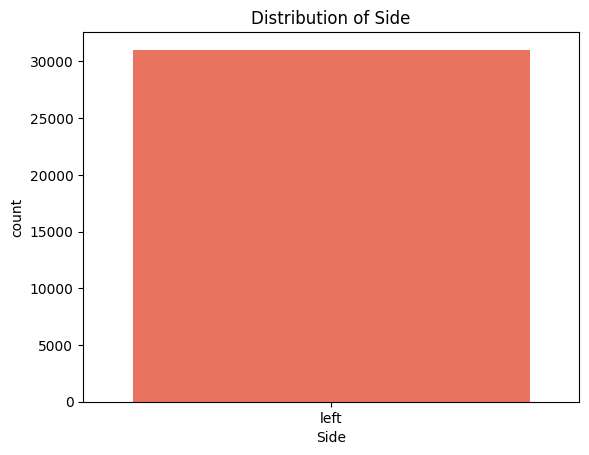

In [ ]:
sns.countplot(data=df, x='Side',color='#FF6347')
plt.title('Distribution of Side')
plt.show()


# Bivariate Analysis

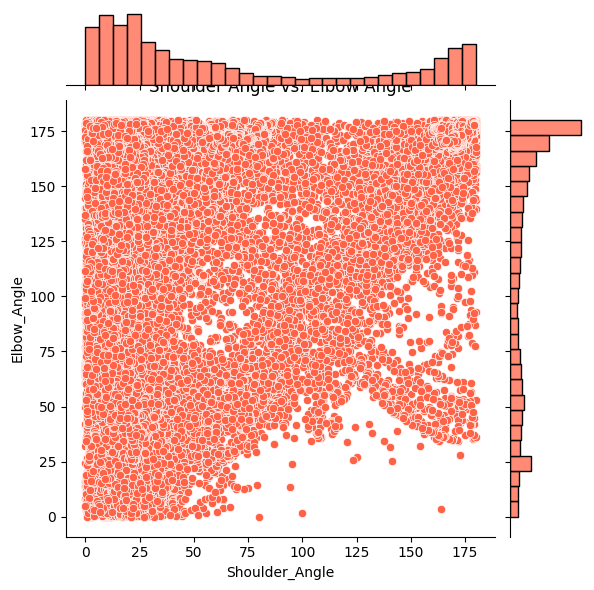

In [ ]:
sns.jointplot(data=df, x='Shoulder_Angle', y='Elbow_Angle', kind='scatter',color='#FF6347')
plt.title('Shoulder Angle vs. Elbow Angle')
plt.show()


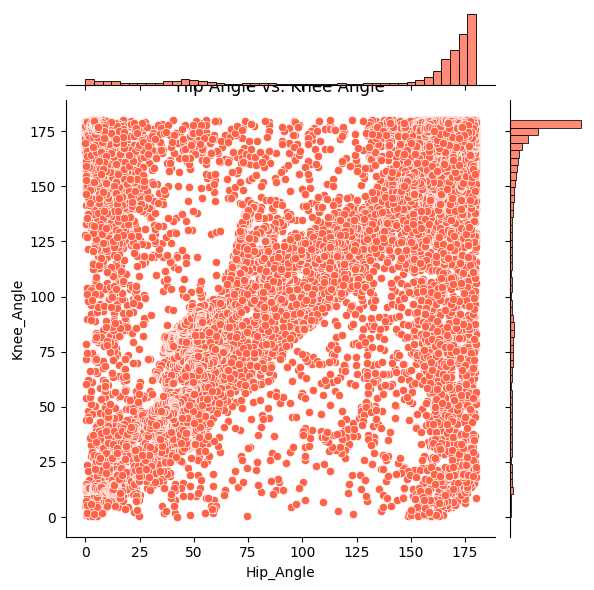

In [ ]:
sns.jointplot(data=df, x='Hip_Angle', y='Knee_Angle', kind='scatter',color='#FF6347')
plt.title('Hip Angle vs. Knee Angle')
plt.show()


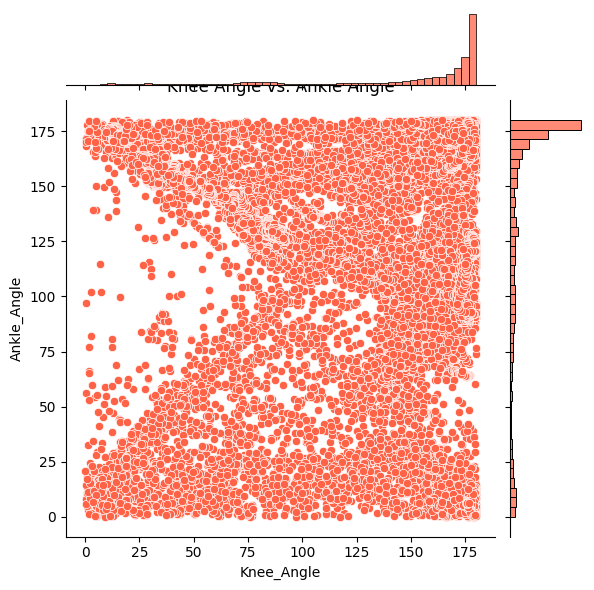

In [ ]:
sns.jointplot(data=df, x='Knee_Angle', y='Ankle_Angle', kind='scatter',color='#FF6347')
plt.title('Knee Angle vs. Ankle Angle')
plt.show()


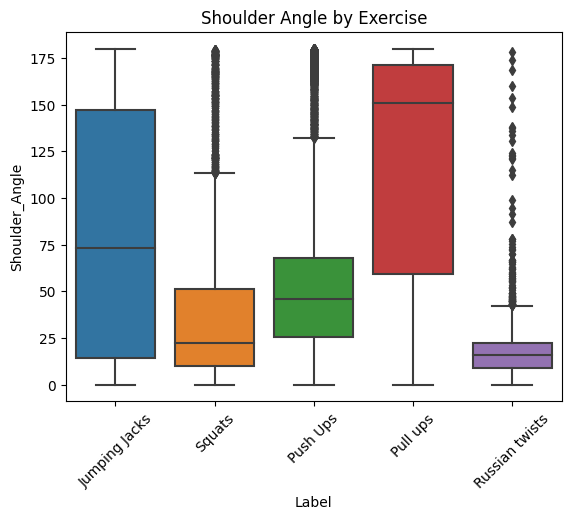

In [ ]:
sns.boxplot(data=df, x='Label', y='Shoulder_Angle')
plt.title('Shoulder Angle by Exercise')
plt.xticks(rotation=45)
plt.show()


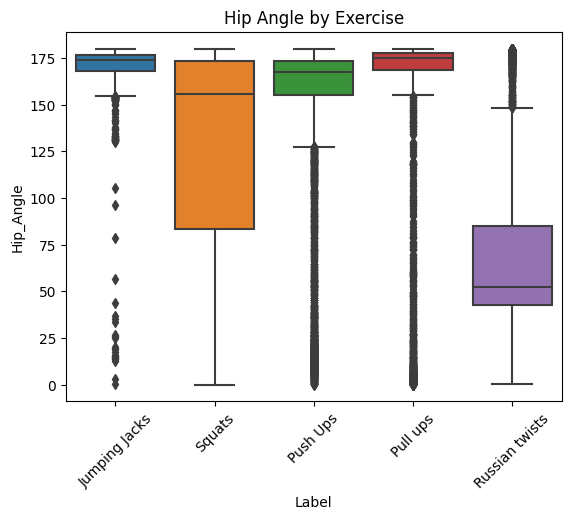

In [ ]:
sns.boxplot(data=df, x='Label', y='Hip_Angle')
plt.title('Hip Angle by Exercise')
plt.xticks(rotation=45)
plt.show()


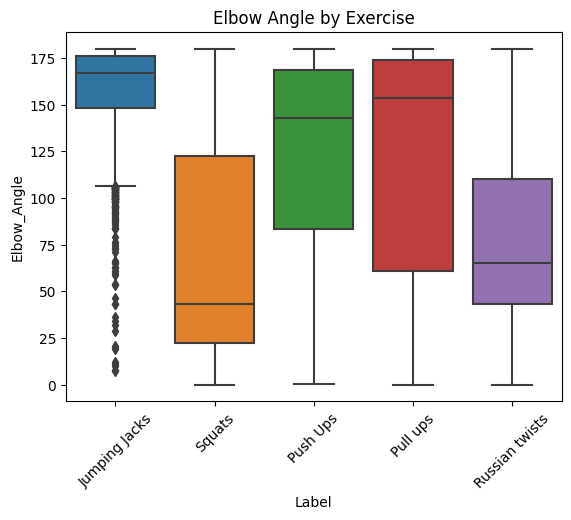

In [ ]:
sns.boxplot(data=df, x='Label', y='Elbow_Angle')
plt.title('Elbow Angle by Exercise')
plt.xticks(rotation=45)
plt.show()


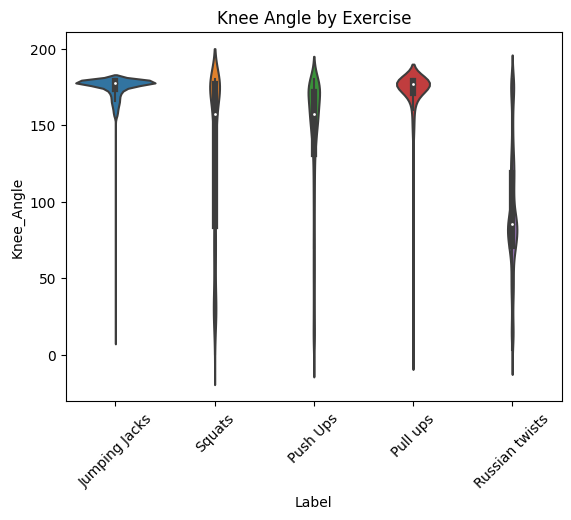

In [ ]:
sns.violinplot(data=df, x='Label', y='Knee_Angle')
plt.title('Knee Angle by Exercise')
plt.xticks(rotation=45)
plt.show()


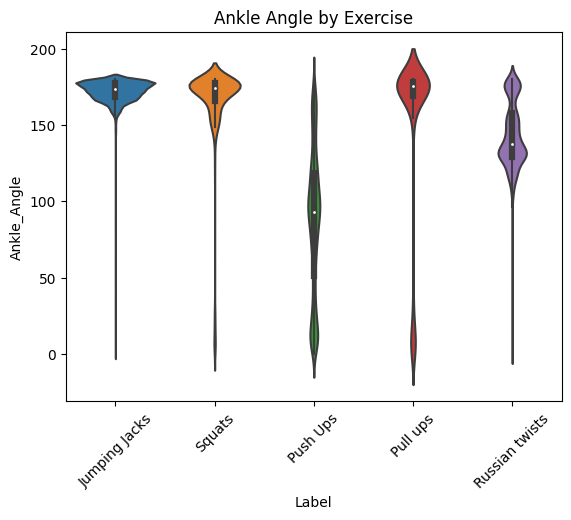

In [ ]:
sns.violinplot(data=df, x='Label', y='Ankle_Angle')
plt.title('Ankle Angle by Exercise')
plt.xticks(rotation=45)
plt.show()


# Multivariate Analysis


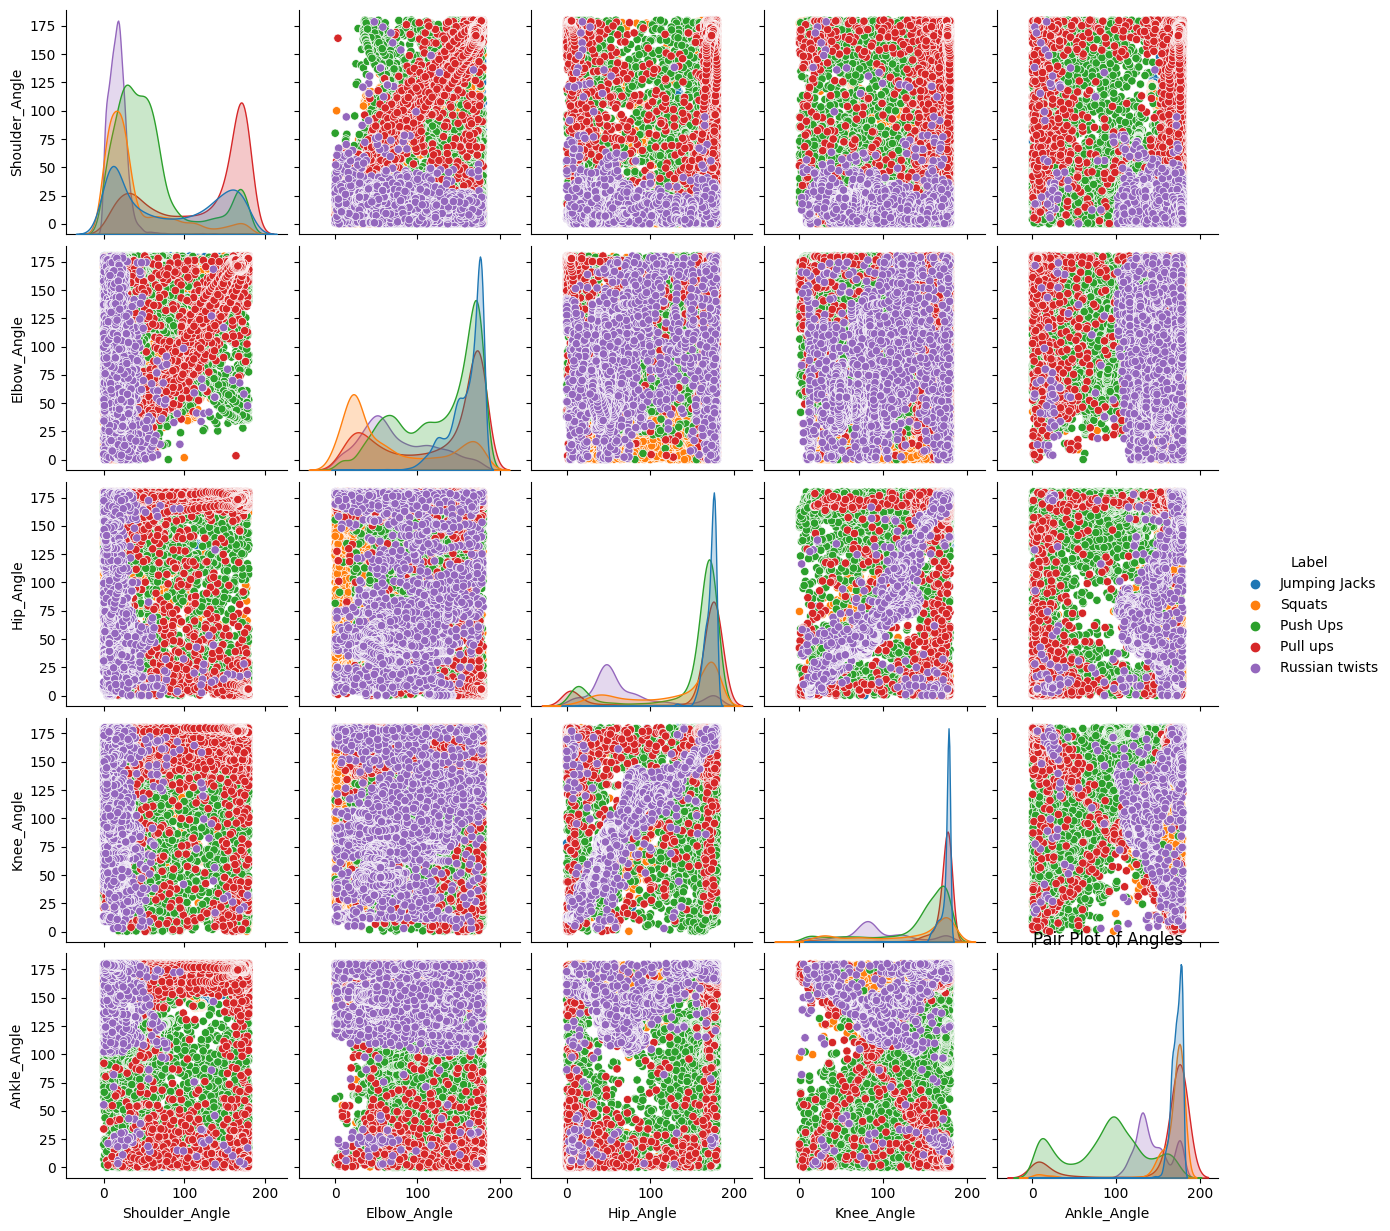

In [ ]:
sns.pairplot(data=df, vars=['Shoulder_Angle', 'Elbow_Angle', 'Hip_Angle', 'Knee_Angle', 'Ankle_Angle'], hue='Label')
plt.title('Pair Plot of Angles')
plt.show()


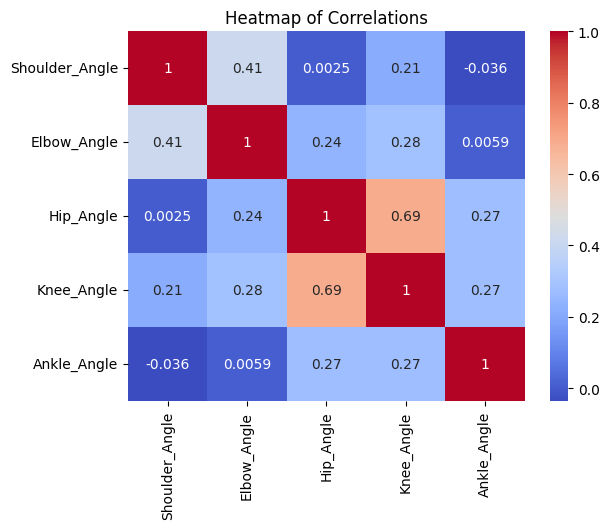

In [ ]:
corr = df[['Shoulder_Angle', 'Elbow_Angle', 'Hip_Angle', 'Knee_Angle', 'Ankle_Angle']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()


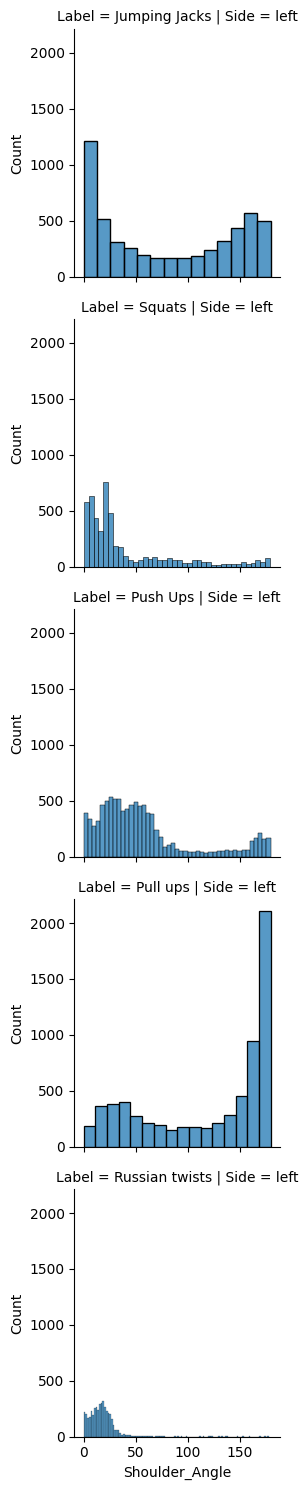

In [ ]:
g = sns.FacetGrid(df, col='Side', row='Label')
g.map(sns.histplot, 'Shoulder_Angle')
plt.show()


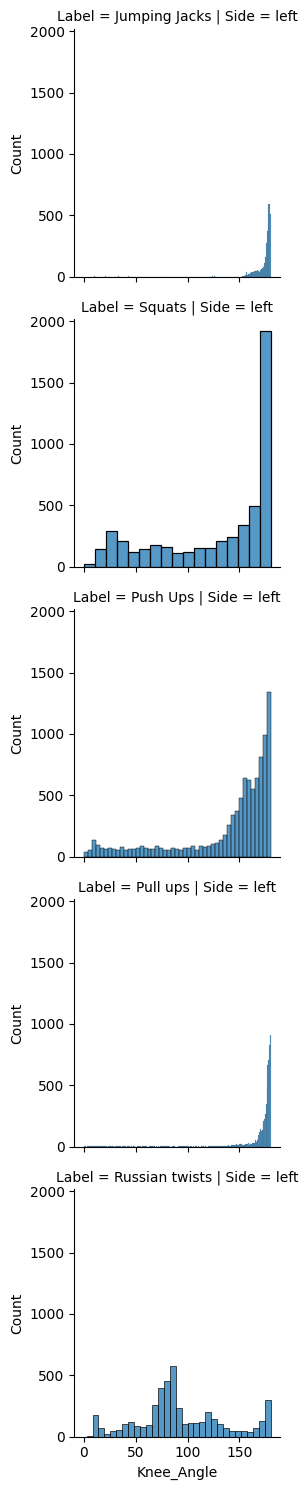

In [ ]:
g = sns.FacetGrid(df, col='Side', row='Label')
g.map(sns.histplot, 'Knee_Angle')
plt.show()


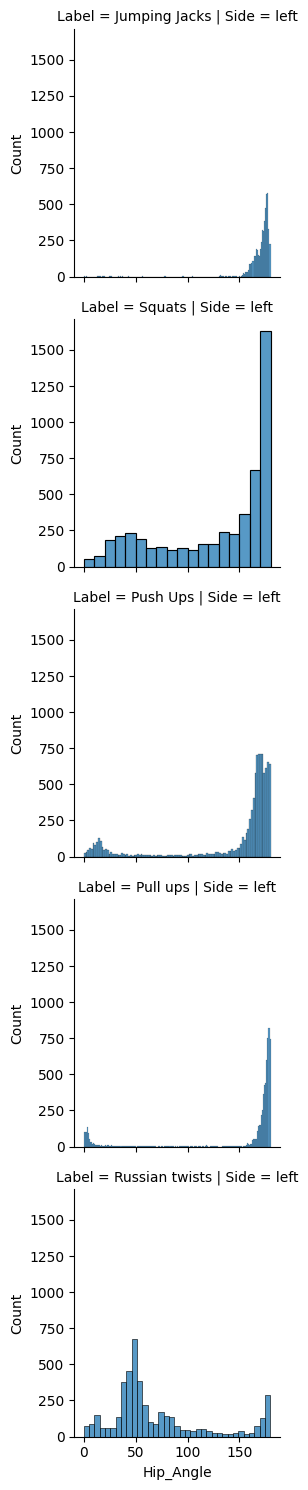

In [ ]:
g = sns.FacetGrid(df, col='Side', row='Label')
g.map(sns.histplot, 'Hip_Angle')
plt.show()


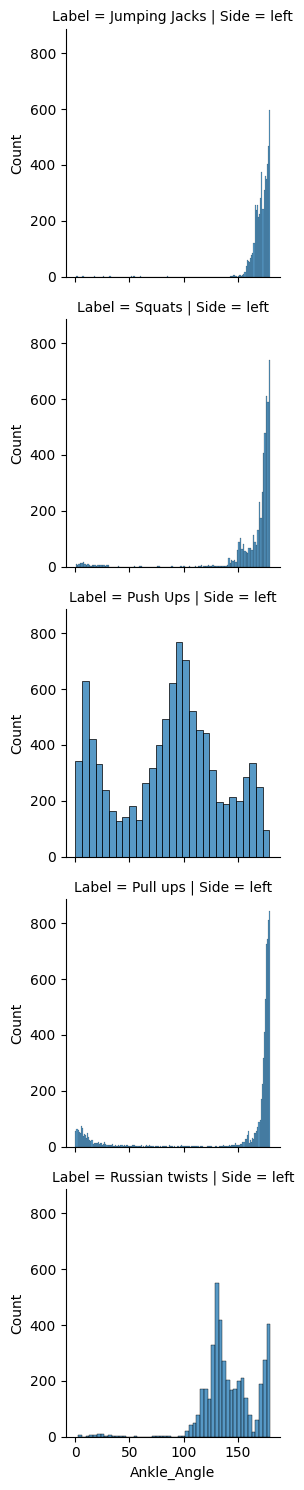

In [ ]:
g = sns.FacetGrid(df, col='Side', row='Label')
g.map(sns.histplot, 'Ankle_Angle')
plt.show()


# Training

Saving kaggle (1).json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/mrigaankjaswal/exercise-detection-dataset
License(s): CC0-1.0
exercise-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
   Side  Shoulder_Angle  Elbow_Angle   Hip_Angle  Knee_Angle  Ankle_Angle  \
0  left       10.639208   174.466813  174.785143  179.848140   179.419276   
1  left       10.590342   174.428706  174.765042  179.775215   179.386147   
2  left       10.546746   174.489431  174.785790  179.660017   179.333710   
3  left       10.487682   174.614913  174.759542  179.614223   179.313926   
4  left       10.412107   174.758503  174.737721  179.570564   179.298805   

   Shoulder_Ground_Angle  Elbow_Ground_Angle  Hip_Ground_Angle  \
0                   90.0                90.0              90.0   
1                   90.0                90.0              90.0   
2                   90.0                90.0              90.0   
3         

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


621/621 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6531 - loss: 0.9128 - val_accuracy: 0.8250 - val_loss: 0.4880
Epoch 2/70
621/621 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7990 - loss: 0.5392 - val_accuracy: 0.8518 - val_loss: 0.4337
Epoch 3/70
621/621 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8140 - loss: 0.4904 - val_accuracy: 0.8617 - val_loss: 0.3955
Epoch 4/70
621/621 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8399 - loss: 0.4507 - val_accuracy: 0.8677 - val_loss: 0.3789
Epoch 5/70
621/621 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8438 - loss: 0.4358 - val_accuracy: 0.8834 - val_loss: 0.3501
Epoch 6/70
621/621 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8550 - loss: 0.4056 - val_accuracy: 0.8834 - val_loss: 0.3377
Epoch 7/70
621/621 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8630 - loss: 0.3858 - val_accuracy: 0.8848 - val_loss: 0.3271
Epoch 8/70
621/621 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8667 - loss: 0.3793 - val_accuracy: 0.8901 - val_

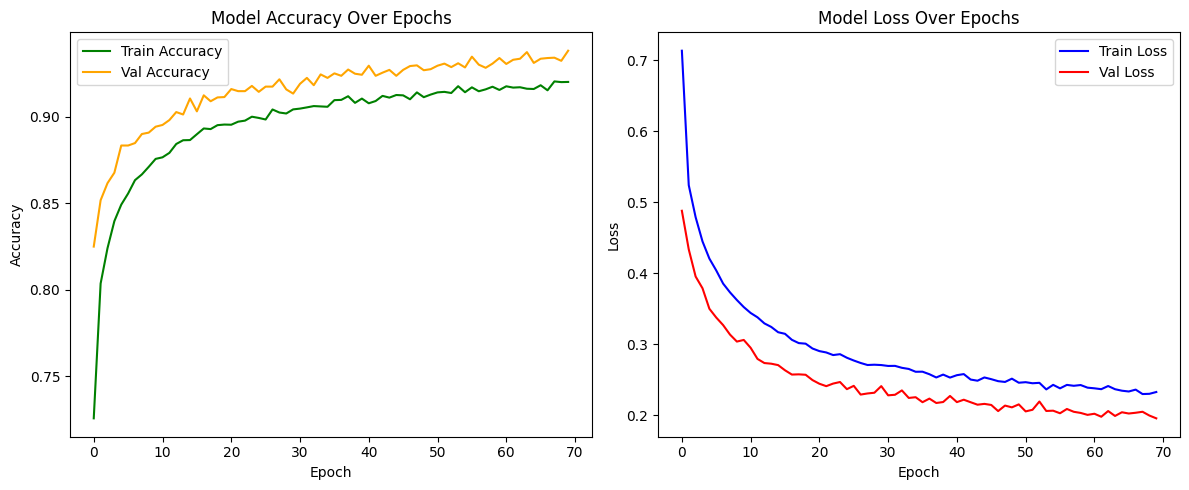

In [8]:
# --- Install Kaggle API ---
!pip install -q kaggle seaborn

# --- Upload your kaggle.json file ---
from google.colab import files
files.upload()  # Upload kaggle.json from your Kaggle account

# --- Setup Kaggle API credentials and download dataset ---
import os
import zipfile

os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)

!kaggle datasets download -d mrigaankjaswal/exercise-detection-dataset

with zipfile.ZipFile('exercise-detection-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('exercise-detection-dataset')

# --- Import necessary libraries ---
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# --- Load the dataset ---
df = pd.read_csv('exercise-detection-dataset/exercise_angles.csv')
print(df.head())
print(df.info())

# --- Data preprocessing ---
df_encoded = pd.get_dummies(df, columns=['Side'], drop_first=True)
label_encoder = LabelEncoder()
df_encoded['Label'] = label_encoder.fit_transform(df_encoded['Label'])

X = df_encoded.drop('Label', axis=1)
y = df_encoded['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_categorical = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y
)

# --- Build the model ---
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --- Train the model for 70 epochs ---
history = model.fit(X_train, y_train, epochs=70, batch_size=32, validation_split=0.2)

# --- Evaluate the model ---
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# --- Plot training history ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='orange')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='red')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Model


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Side'], drop_first=True)
label_encoder = LabelEncoder()
df_encoded['Label'] = label_encoder.fit_transform(df_encoded['Label'])
X = df_encoded.drop('Label', axis=1)
y = df_encoded['Label']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 997   28    6    1   10]
 [  10 1275   33    3   11]
 [   4    0 1942    1    6]
 [   0    3   13  846   19]
 [  17   33   23    8  918]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1042
           1       0.95      0.96      0.95      1332
           2       0.96      0.99      0.98      1953
           3       0.98      0.96      0.97       881
           4       0.95      0.92      0.94       999

    accuracy                           0.96      6207
   macro avg       0.96      0.96      0.96      6207
weighted avg       0.96      0.96      0.96      6207



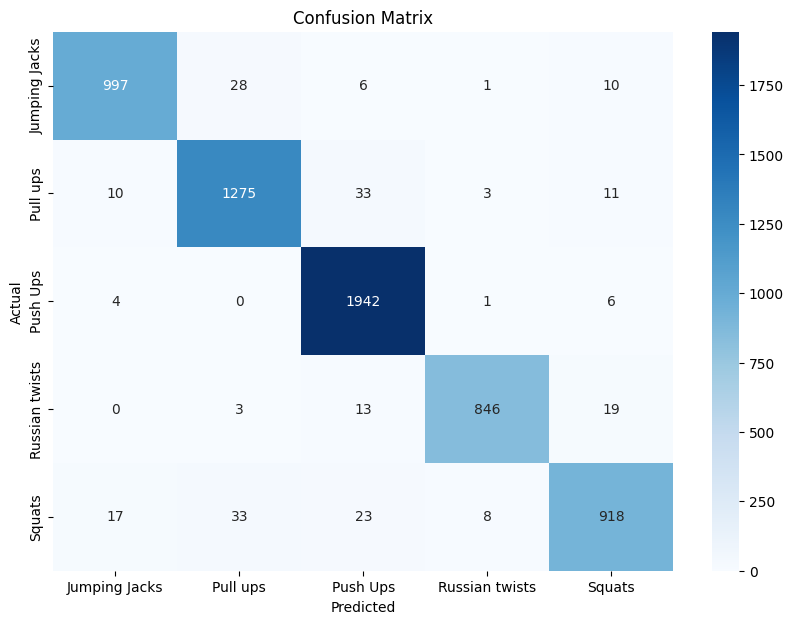

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


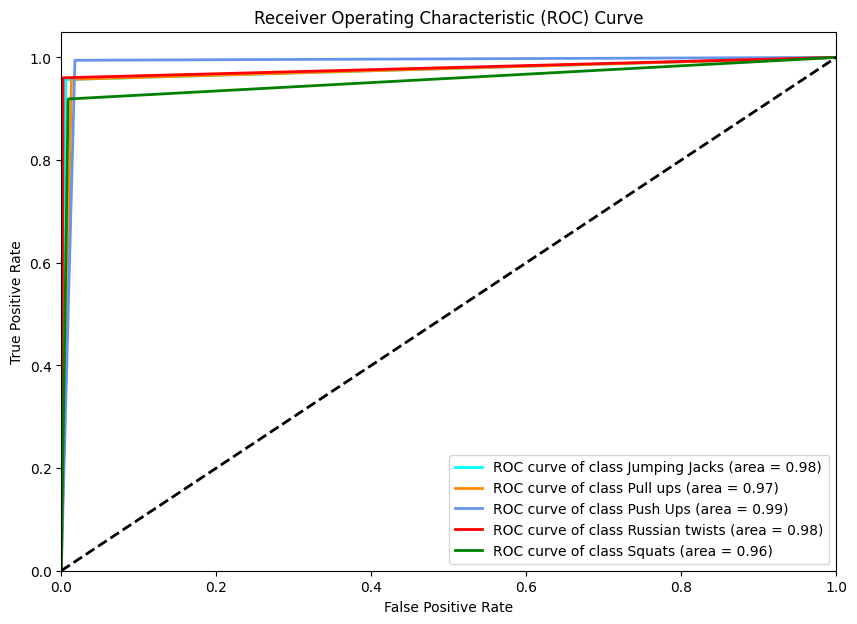

In [ ]:
y_test_bin = label_binarize(y_test, classes=range(len(label_encoder.classes_)))
y_pred_bin = label_binarize(y_pred, classes=range(len(label_encoder.classes_)))

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 7))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_encoder.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


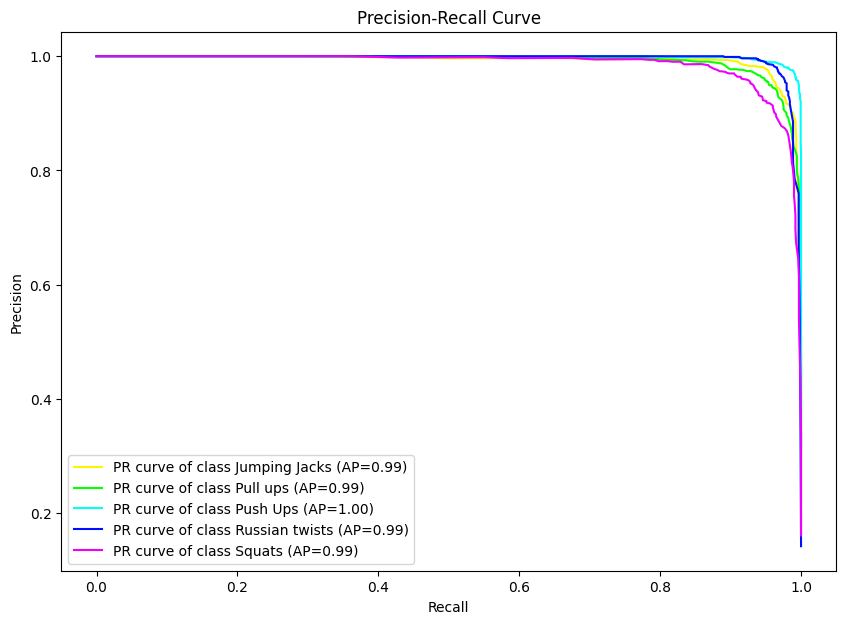

In [ ]:
y_test_bin = label_binarize(y_test, classes=range(len(label_encoder.classes_)))
n_classes = y_test_bin.shape[1]

precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], clf.predict_proba(X_test)[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], clf.predict_proba(X_test)[:, i])


plt.figure(figsize=(10, 7))
colors = sns.color_palette("hsv", n_classes)

for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color,
             label=f'PR curve of class {label_encoder.classes_[i]} (AP={average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


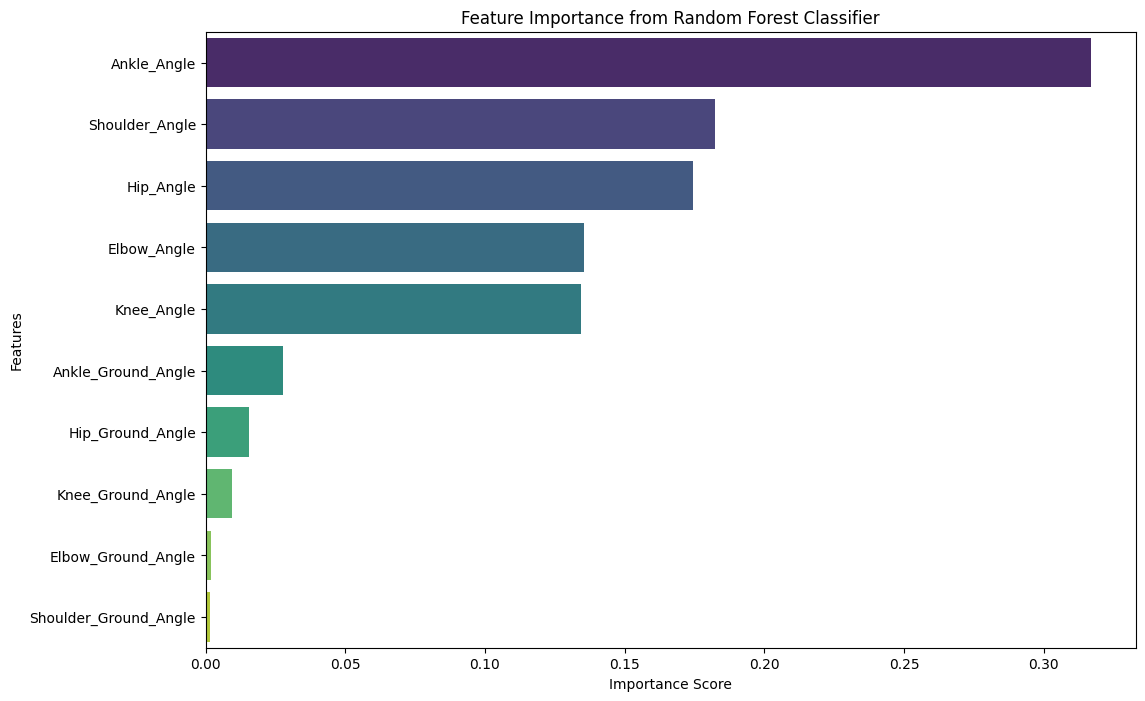

In [ ]:
importances = clf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
